In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
import math as m

# Exploring
import scipy.stats as stats
from scipy.spatial.distance import cdist
from scipy.cluster.vq import kmeans2, whiten
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# Visualizing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import rcParams
from matplotlib import figure
import seaborn as sns
from sklearn.model_selection import learning_curve
%matplotlib inline

# Modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from scipy.stats import pearsonr
from scipy.stats import iqr

pd.options.display.float_format = '{:20,.2f}'.format

# Personal Function Files
from acquire import *
from prepare_zillow import *
from explore_zillow import *

In [2]:
# turn_to_csv()

In [3]:
df = pd.read_csv('zillow_16_17.csv', sep='\t')

In [4]:
description_df = df[['unitcnt','propertylandusedesc',
                     'propertycountylandusecode', 'propertyzoningdesc', 'heatingorsystemdesc']]

In [5]:
df = drop_columns(df)

In [6]:
df = reindex_df(df)

In [7]:
df = dropna_fields(df)

In [8]:
df = unitcnt(df)

In [9]:
df = field_temp_drop(df)

In [10]:
df = lat_long_null_values(df)

In [11]:
df = drop_null(df)

In [12]:
df = df.dropna()

In [13]:
df = logerror_manipulation_func(df)

In [14]:
cols = list([
 'logerror',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'lotsizesquarefeet',
 'latitude',
 'longitude',
 'regionidcity',
 'regionidzip',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount'])

col_1 = list([
 'logerror',
 'latitude',
 'longitude',
 'regionidcity',
 'regionidzip',
 'yearbuilt'])

col_2 = list([
 'logerror',
 'yearbuilt'])

col_3 = list([
 'logerror',
 'lotsizesquarefeet',
 'landtaxvaluedollarcnt',])

col_4 = list([
 'logerror',
 'longitude',
 'latitude',])

In [15]:
df.describe().T

count                  mean  \
parcelid                                92,574.00         11,857,871.36   
logerror                                92,574.00                  0.01   
bathroomcnt                             92,574.00                  2.18   
bedroomcnt                              92,574.00                  2.95   
calculatedfinishedsquarefeet            92,574.00              1,665.61   
lotsizesquarefeet                       92,574.00             38,684.91   
latitude                                92,574.00         34,104,673.72   
longitude                               92,574.00       -118,256,601.77   
regionidcity                            92,574.00             35,419.06   
regionidzip                             92,574.00             96,345.70   
yearbuilt                               92,574.00              1,962.35   
structuretaxvaluedollarcnt              92,574.00            172,867.52   
taxvaluedollarcnt                       92,574.00            445,939.22   
landtaxvaluedollarcnt                   92,574.00            273,071.70   
taxamount                               92,574.00              5,836.47   
assessmentyear                          92,574.00              2,015.47   
rawcensustractandblock                  92,574.00         60,374,455.81   
censustractandblock                     92,574.00 60,379,035,558,596.81   
abs_log                                 92,574.00                  0.07   

                                              std                   min  \
parcelid                               719,582.17         10,711,738.00   
logerror                                     0.16                 -4.66   
bathroomcnt                                  0.97                  1.00   
bedroomcnt                                   0.99                  1.00   
calculatedfinishedsquarefeet               885.81                214.00   
lotsizesquarefeet                      146,062.08                857.00   
latitude                               219,561.93         33,339,527.00   
longitude                              215,492.71       -118,908,236.00   
regionidcity                            57,861.00              3,491.00   
regionidzip                                332.53             95,982.00   
yearbuilt                                   23.10              1,878.00   
structuretaxvaluedollarcnt             225,655.85                100.00   
taxvaluedollarcnt                      640,192.05              3,254.00   
landtaxvaluedollarcnt                  464,159.81                161.00   
taxamount                                7,780.71                120.84   
assessmentyear                               0.50              2,015.00   
rawcensustractandblock                   3,201.42         60,371,011.10   
censustractandblock          1,389,132,193,879.04 60,371,011,101,000.00   
abs_log                                      0.14                  0.00   

                                               25%                   50%  \
parcelid                             11,195,035.25         11,852,924.00   
logerror                                     -0.03                  0.01   
bathroomcnt                                   2.00                  2.00   
bedroomcnt                                    2.00                  3.00   
calculatedfinishedsquarefeet              1,128.00              1,448.00   
lotsizesquarefeet                         6,040.00              7,621.00   
latitude                             33,957,799.25         34,086,700.00   
longitude                          -118,418,895.00       -118,273,284.50   
regionidcity                             12,447.00             14,634.00   
regionidzip                              96,123.00             96,282.00   
yearbuilt                                 1,949.00              1,959.00   
structuretaxvaluedollarcnt               79,000.00            125,805.50   
taxvaluedollarcnt                       173,396.00    

In [16]:
scale_df = scale_min_max_iris(df)

In [17]:
df.describe().T

count                  mean  \
parcelid                                92,574.00         11,857,871.36   
logerror                                92,574.00                  0.01   
bathroomcnt                             92,574.00                  2.18   
bedroomcnt                              92,574.00                  2.95   
calculatedfinishedsquarefeet            92,574.00              1,665.61   
lotsizesquarefeet                       92,574.00             38,684.91   
latitude                                92,574.00         34,104,673.72   
longitude                               92,574.00       -118,256,601.77   
regionidcity                            92,574.00             35,419.06   
regionidzip                             92,574.00             96,345.70   
yearbuilt                               92,574.00              1,962.35   
structuretaxvaluedollarcnt              92,574.00            172,867.52   
taxvaluedollarcnt                       92,574.00            445,939.22   
landtaxvaluedollarcnt                   92,574.00            273,071.70   
taxamount                               92,574.00              5,836.47   
assessmentyear                          92,574.00              2,015.47   
rawcensustractandblock                  92,574.00         60,374,455.81   
censustractandblock                     92,574.00 60,379,035,558,596.81   
abs_log                                 92,574.00                  0.07   

                                              std                   min  \
parcelid                               719,582.17         10,711,738.00   
logerror                                     0.16                 -4.66   
bathroomcnt                                  0.97                  1.00   
bedroomcnt                                   0.99                  1.00   
calculatedfinishedsquarefeet               885.81                214.00   
lotsizesquarefeet                      146,062.08                857.00   
latitude                               219,561.93         33,339,527.00   
longitude                              215,492.71       -118,908,236.00   
regionidcity                            57,861.00              3,491.00   
regionidzip                                332.53             95,982.00   
yearbuilt                                   23.10              1,878.00   
structuretaxvaluedollarcnt             225,655.85                100.00   
taxvaluedollarcnt                      640,192.05              3,254.00   
landtaxvaluedollarcnt                  464,159.81                161.00   
taxamount                                7,780.71                120.84   
assessmentyear                               0.50              2,015.00   
rawcensustractandblock                   3,201.42         60,371,011.10   
censustractandblock          1,389,132,193,879.04 60,371,011,101,000.00   
abs_log                                      0.14                  0.00   

                                               25%                   50%  \
parcelid                             11,195,035.25         11,852,924.00   
logerror                                     -0.03                  0.01   
bathroomcnt                                   2.00                  2.00   
bedroomcnt                                    2.00                  3.00   
calculatedfinishedsquarefeet              1,128.00              1,448.00   
lotsizesquarefeet                         6,040.00              7,621.00   
latitude                             33,957,799.25         34,086,700.00   
longitude                          -118,418,895.00       -118,273,284.50   
regionidcity                             12,447.00             14,634.00   
regionidzip                              96,123.00             96,282.00   
yearbuilt                                 1,949.00              1,959.00   
structuretaxvaluedollarcnt               79,000.00            125,805.50   
taxvaluedollarcnt                       173,396.00    

In [18]:
scale_df.describe().T

count                 mean  \
abs_log                                 92,574.00                 0.07   
assessmentyear                          92,574.00                 0.47   
bathroomcnt                             92,574.00                 2.18   
bedroomcnt                              92,574.00                 2.95   
calculatedfinishedsquarefeet            92,574.00                 0.07   
censustractandblock                     92,574.00                 0.00   
landtaxvaluedollarcnt                   92,574.00                 0.01   
latitude                                92,574.00                 0.52   
logerror                                92,574.00                 0.01   
longitude                               92,574.00                 0.52   
lotsizesquarefeet                       92,574.00                 0.01   
parcelid                                92,574.00        11,857,871.36   
rawcensustractandblock                  92,574.00                 0.02   
regionidcity                            92,574.00                 0.08   
regionidzip                             92,574.00                 0.27   
structuretaxvaluedollarcnt              92,574.00                 0.02   
taxamount                               92,574.00                 0.02   
taxvaluedollarcnt                       92,574.00                 0.02   
yearbuilt                               92,574.00                 0.61   

                                              std                  min  \
abs_log                                      0.14                 0.00   
assessmentyear                               0.50                 0.00   
bathroomcnt                                  0.97                 1.00   
bedroomcnt                                   0.99                 1.00   
calculatedfinishedsquarefeet                 0.04                 0.00   
censustractandblock                          0.00                 0.00   
landtaxvaluedollarcnt                        0.02                 0.00   
latitude                                     0.15                 0.00   
logerror                                     0.16                -4.66   
longitude                                    0.17                 0.00   
lotsizesquarefeet                            0.02                 0.00   
parcelid                               719,582.17        10,711,738.00   
rawcensustractandblock                       0.01                 0.00   
regionidcity                                 0.15                 0.00   
regionidzip                                  0.24                 0.00   
structuretaxvaluedollarcnt                   0.02                 0.00   
taxamount                                    0.02                 0.00   
taxvaluedollarcnt                            0.02                 0.00   
yearbuilt                                    0.17                 0.00   

                                              25%                  50%  \
abs_log                                      0.02                 0.03   
assessmentyear                               0.00                 0.00   
bathroomcnt                                  2.00                 2.00   
bedroomcnt                                   2.00                 3.00   
calculatedfinishedsquarefeet                 0.04                 0.06   
censustractandblock                          0.00                 0.00   
landtaxvaluedollarcnt                        0.00                 0.01   
latitude                                     0.42                 0.51   
logerror                                    -0.03                 0.01   
longitude                                    0.39                 0.51   
lotsizesquarefeet                            0.00                 0.00   
parcelid                            11,195,035.25        11,852,924.00   
rawcensustractandblock                       0.01                 0.01   
regionidcity                                 0

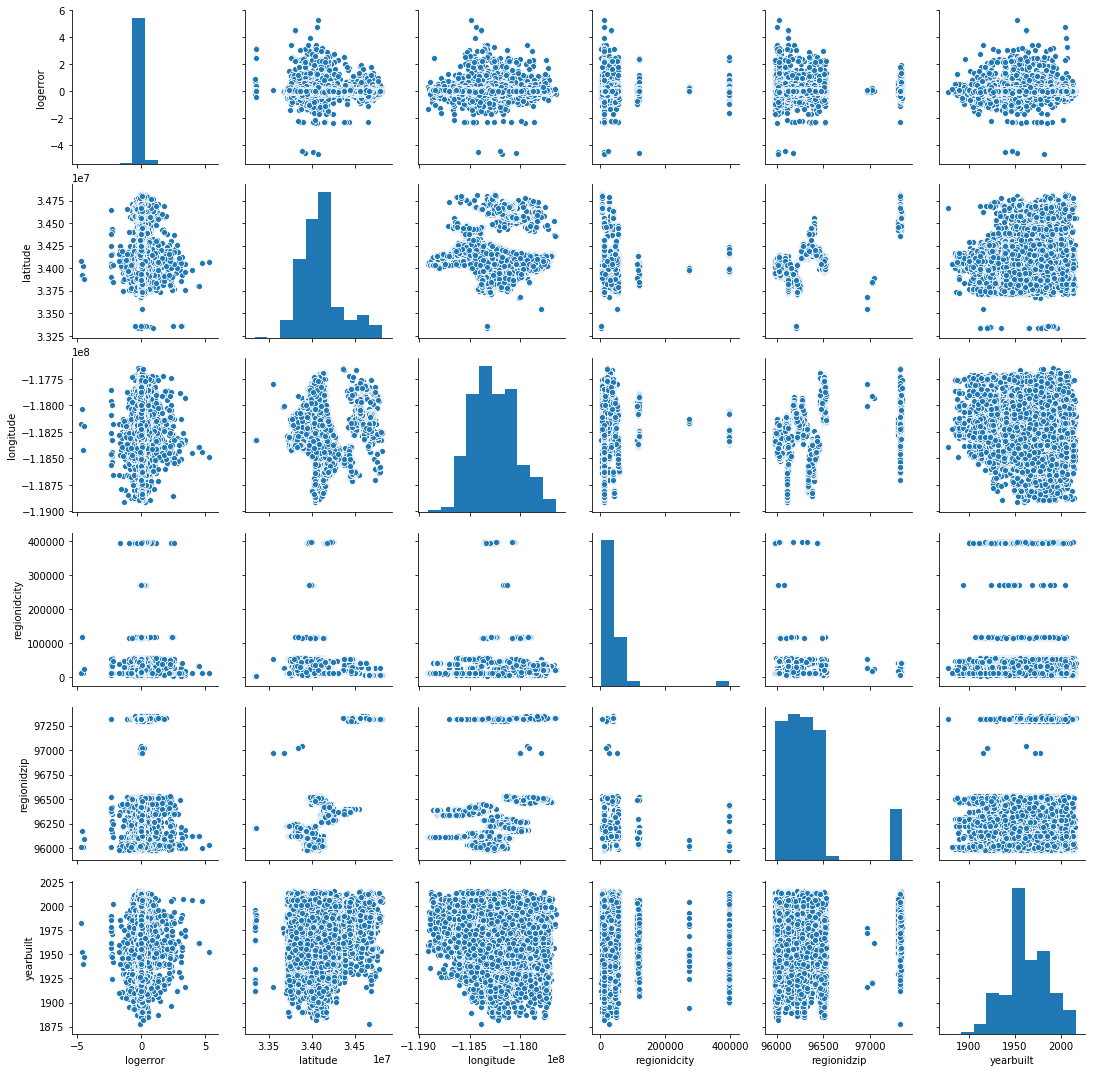

In [19]:
pairplot_func(df, col_1)

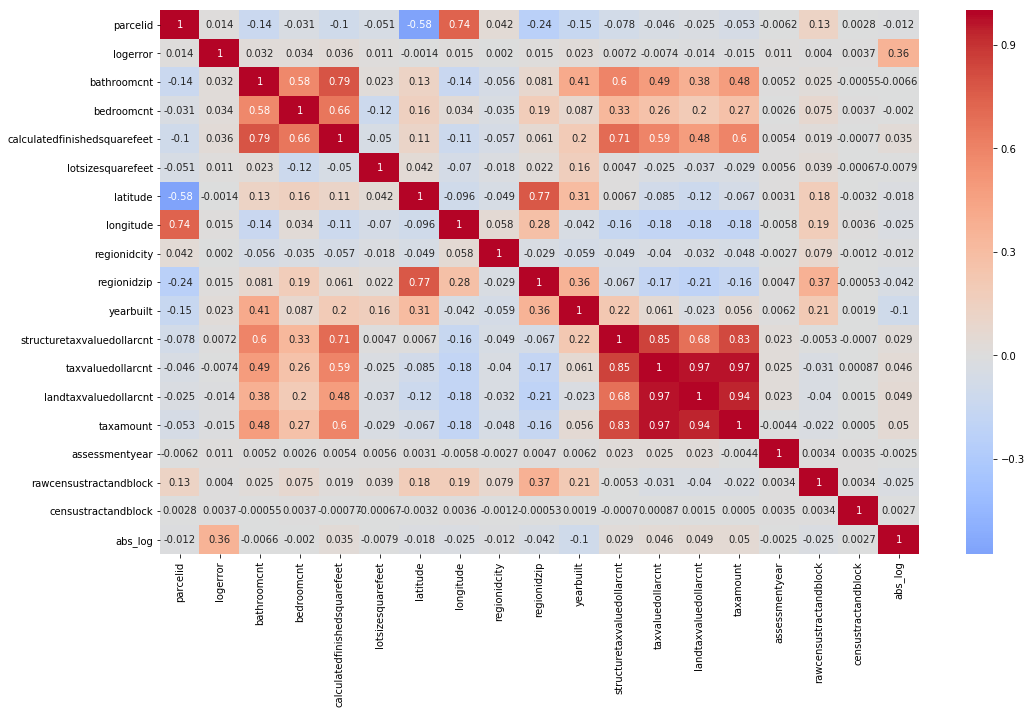

In [20]:
heatmap_func(df)

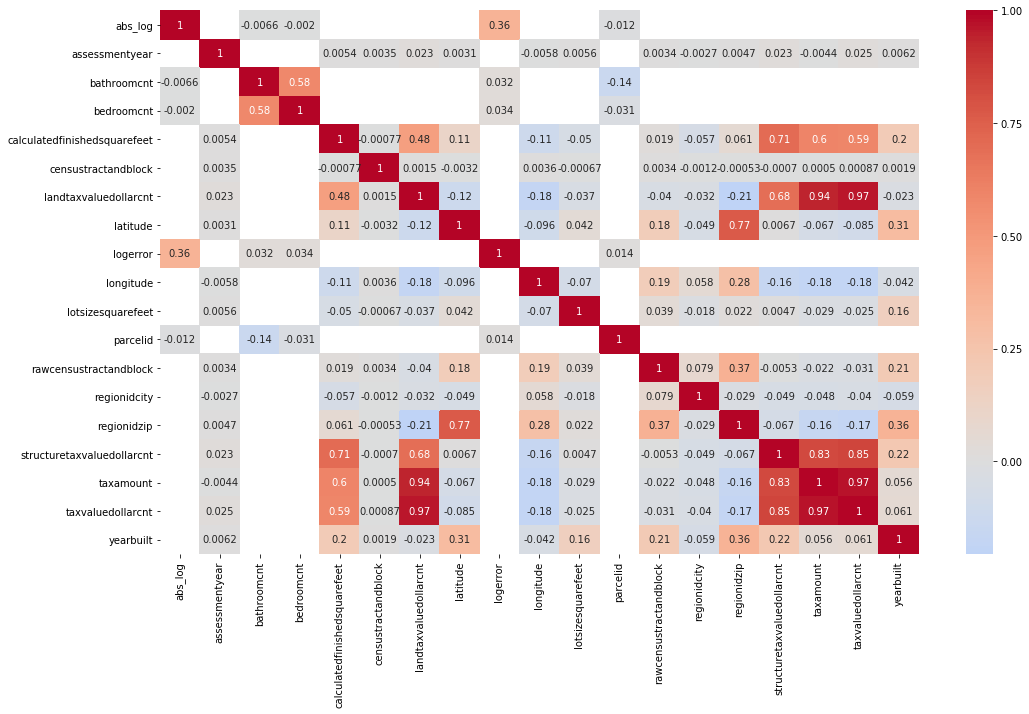

In [21]:
heatmap_func(scale_df)

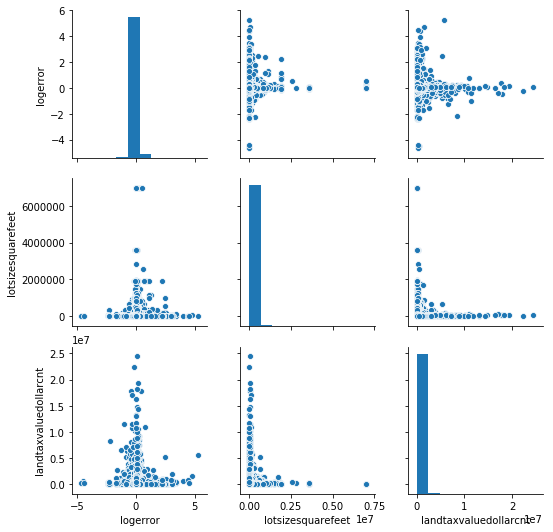

In [22]:
pairplot_func(df, col_3)

### Wasn't really sure if I had seen anything yet. I had a thought that log error might be high in certain locations. To check this i needed to look at lat/long and log error all together. Since this dataset is so dense iit would not be feasible to use a 2D scatter plot. I decided it would make sense to use a 3D plot because it would give a better view of the high/low log errors in relation to the lt/long. I went with a TriTurf plot to start.

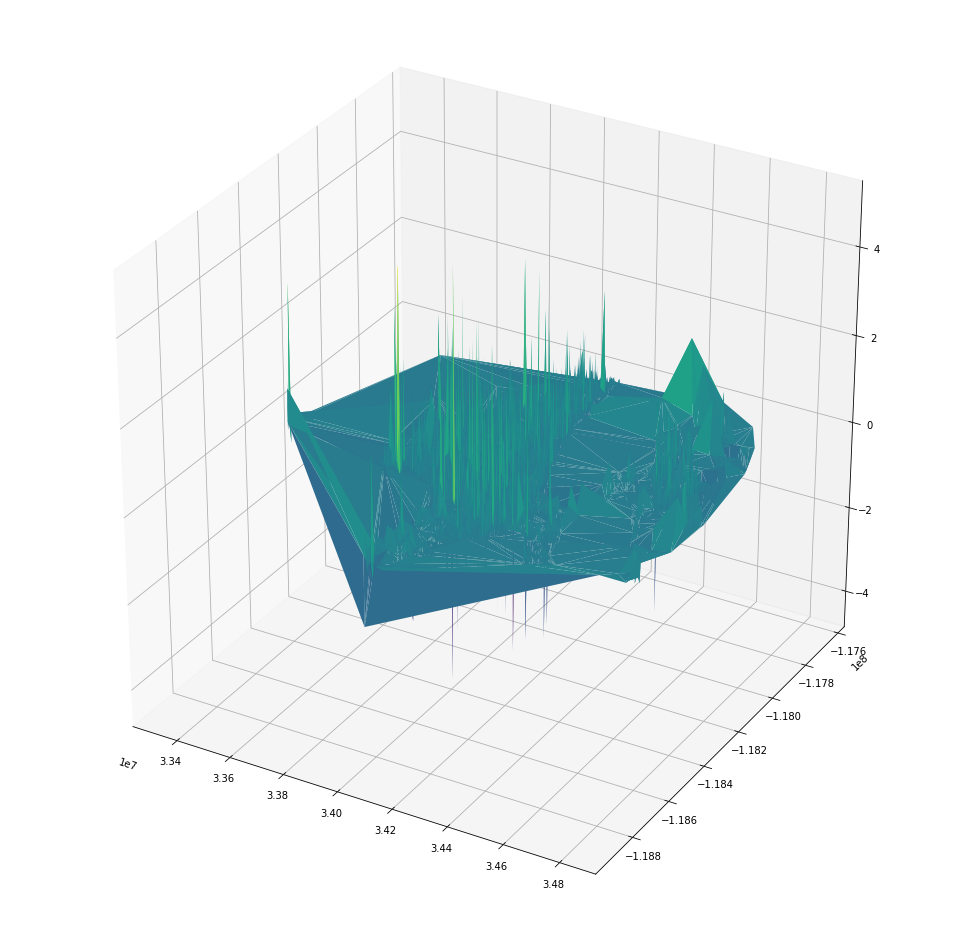

In [23]:
trisurf_func(df.latitude, df.longitude, df.logerror)

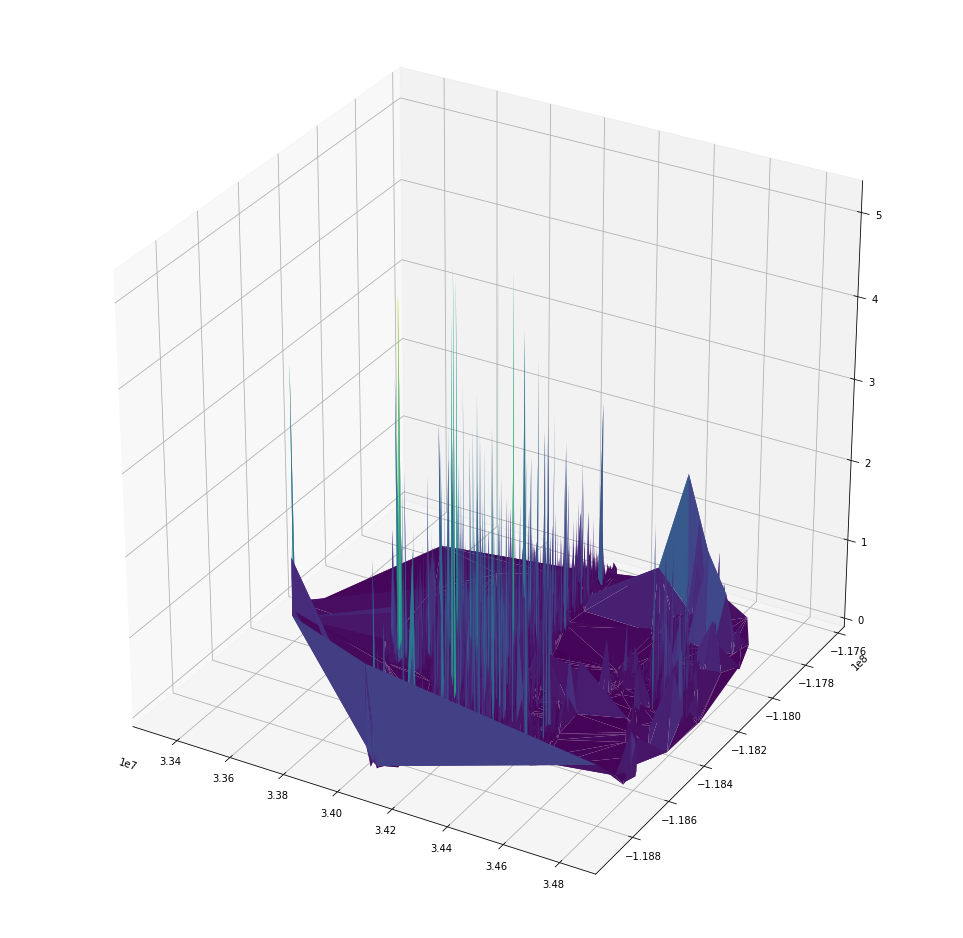

In [24]:
trisurf_func(df.latitude, df.longitude, df.abs_log)

### The TriSurf plot is helpful in showing that this type of plot (3D) is appropriate for viewing this type of data, but the TriSurf plot itself is not helpful in and of itself because the Z-axis data (logerror) is highly sporatic. A TriSurf plot needs less dramatic shifts in the Z-axis and there needs to be more density in the X-axis and the Y-axis, would be very useful for geopraghic data if elevation was given. Because this plot wasn't appropriate I decided to try using a 3D Scatterplot.

In [25]:
scatter_3d(df.latitude, df.longitude, df.logerror)

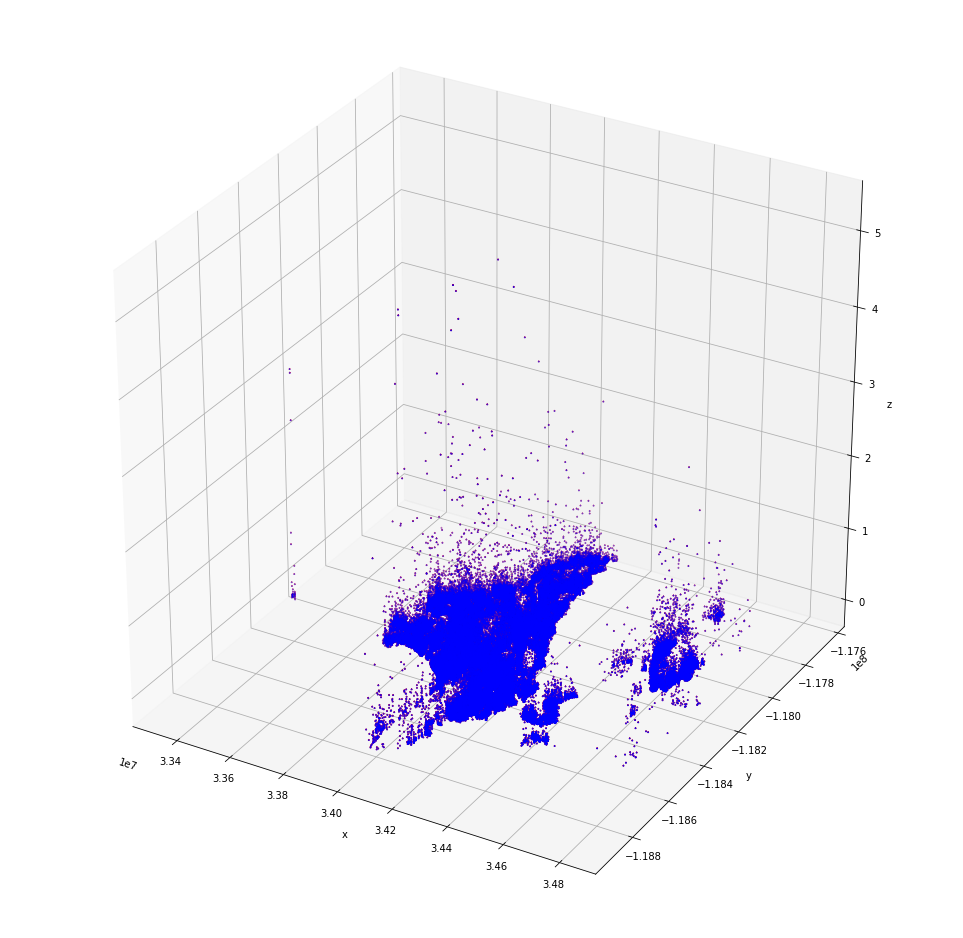

In [26]:
scatter_3d(df.latitude, df.longitude, df.abs_log)

In [27]:


scatter_3d(df.latitude, df.longitude, df.logerror_bin)

ValueError: could not convert string to float: 'medium-'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1c1b1c4c80> (for post_execute):


TypeError: can't multiply sequence by non-int of type 'float'

TypeError: can't multiply sequence by non-int of type 'float'

<Figure size 1224x1224 with 1 Axes>

In [28]:
pdf = df[['logerror_bin', 'abs_log']]
pdf

logerror_bin              abs_log
0           medium-                 0.03
2              good                 0.00
3           medium-                 0.02
5               bad                 0.27
6           medium+                 0.04
10              bad                 0.38
11          medium-                 0.02
12          medium-                 0.03
17          medium+                 0.04
19             good                 0.01
20          medium+                 0.04
23              bad                 0.12
25          medium+                 0.04
26              bad                 0.07
28             good                 0.00
29          medium+                 0.05
30          medium+                 0.04
31          medium-                 0.03
32          medium-                 0.02
33          medium-                 0.02
34          medium-                 0.03
35          medium-                 0.02
38          medium+                 0.05
40          medium+                 0.04
43          medium+                 0.04
44              bad                 0.09
46          medium+                 0.04
48          medium+                 0.04
49          medium+                 0.04
50          medium-                 0.02
...             ...                  ...
167854         good                 0.01
167855      medium-                 0.03
167856      medium-                 0.02
167858          bad                 0.09
167859      medium+                 0.06
167860      medium+                 0.05
167861      medium-                 0.02
167862         good                 0.00
167863          bad                 1.29
167864         good                 0.00
167865      medium+                 0.04
167866          bad                 0.23
167868      medium+                 0.07
167869         good                 0.00
167870      medium+                 0.05
167871         good                 0.00
167873          bad                 0.82
167874      medium+                 0.06
167875         good                 0.01
167876      medium+                 0.05
167877          bad                 0.14
167878          bad                 0.32
167879      medium-                 0.03
167880          bad                 0.08
167881          bad                 0.08
167882         good                 0.00
167883         good                 0.00
167884      medium-                 0.02
167886      medium+                 0.04
167887         good                 0.01

[92574 rows x 2 columns]

### Run a pairplot on lat/long and log error to look at their relationships 2-dimensionally

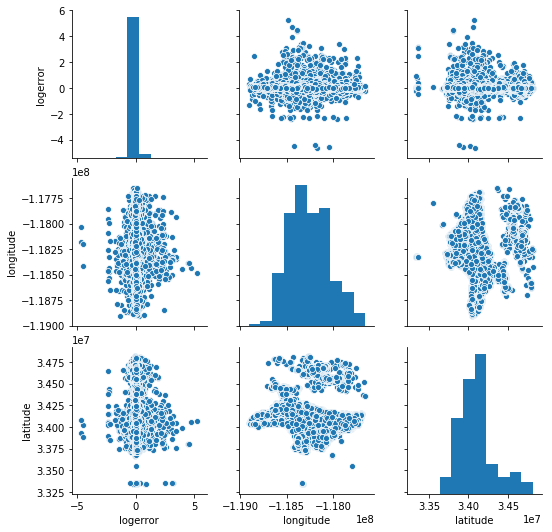

In [29]:
pairplot_func(df, col_4)

### After running the 3d scatterplot I could see concentrated areas of homes. The 3D view was sshowing me that there was a large number of datapoints on top of each other making it very hard to see what was going on or how much was really there. As seen before the 2D scatter plots do a poor job of showing an extremely dense plot. From there I decided that a KDE density plot was the most appropriate plot to check next.

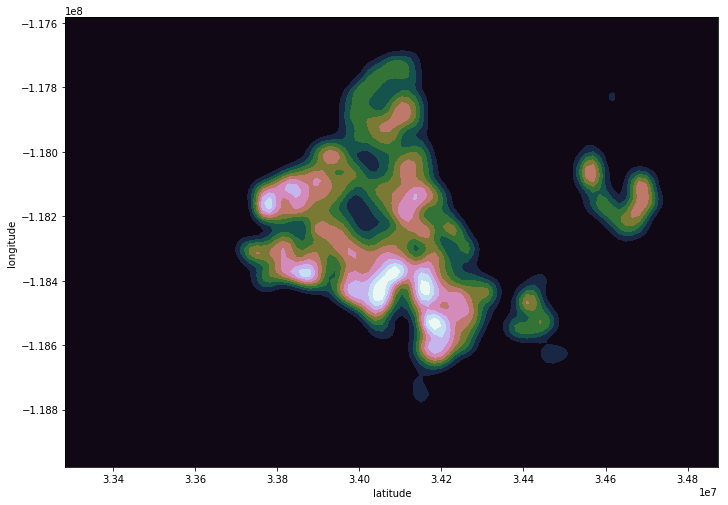

In [30]:
kde_func(df.latitude, df.longitude)

# <span style="color:red"> Time to start clustering </span>

### Looking at the kde plot I can see several key points that I might want a centroid for clustering. I will run 4 kmeans looking at 5, 6, 7, 8, 9 and 10 centroids to see which is more accurate. My presumption is that 8 will be the most accurate, but because of how close the high levels of density are, and how spread out the low levels of density are looking at a lower and higher number of centroids is necessary.

# <span style="color:red"> Need to do the T-Tests and Chi-Squared Tests </span>

In [31]:
df.describe().T

count                  mean  \
parcelid                                92,574.00         11,857,871.36   
logerror                                92,574.00                  0.01   
bathroomcnt                             92,574.00                  2.18   
bedroomcnt                              92,574.00                  2.95   
calculatedfinishedsquarefeet            92,574.00              1,665.61   
lotsizesquarefeet                       92,574.00             38,684.91   
latitude                                92,574.00         34,104,673.72   
longitude                               92,574.00       -118,256,601.77   
regionidcity                            92,574.00             35,419.06   
regionidzip                             92,574.00             96,345.70   
yearbuilt                               92,574.00              1,962.35   
structuretaxvaluedollarcnt              92,574.00            172,867.52   
taxvaluedollarcnt                       92,574.00            445,939.22   
landtaxvaluedollarcnt                   92,574.00            273,071.70   
taxamount                               92,574.00              5,836.47   
assessmentyear                          92,574.00              2,015.47   
rawcensustractandblock                  92,574.00         60,374,455.81   
censustractandblock                     92,574.00 60,379,035,558,596.81   
abs_log                                 92,574.00                  0.07   

                                              std                   min  \
parcelid                               719,582.17         10,711,738.00   
logerror                                     0.16                 -4.66   
bathroomcnt                                  0.97                  1.00   
bedroomcnt                                   0.99                  1.00   
calculatedfinishedsquarefeet               885.81                214.00   
lotsizesquarefeet                      146,062.08                857.00   
latitude                               219,561.93         33,339,527.00   
longitude                              215,492.71       -118,908,236.00   
regionidcity                            57,861.00              3,491.00   
regionidzip                                332.53             95,982.00   
yearbuilt                                   23.10              1,878.00   
structuretaxvaluedollarcnt             225,655.85                100.00   
taxvaluedollarcnt                      640,192.05              3,254.00   
landtaxvaluedollarcnt                  464,159.81                161.00   
taxamount                                7,780.71                120.84   
assessmentyear                               0.50              2,015.00   
rawcensustractandblock                   3,201.42         60,371,011.10   
censustractandblock          1,389,132,193,879.04 60,371,011,101,000.00   
abs_log                                      0.14                  0.00   

                                               25%                   50%  \
parcelid                             11,195,035.25         11,852,924.00   
logerror                                     -0.03                  0.01   
bathroomcnt                                   2.00                  2.00   
bedroomcnt                                    2.00                  3.00   
calculatedfinishedsquarefeet              1,128.00              1,448.00   
lotsizesquarefeet                         6,040.00              7,621.00   
latitude                             33,957,799.25         34,086,700.00   
longitude                          -118,418,895.00       -118,273,284.50   
regionidcity                             12,447.00             14,634.00   
regionidzip                              96,123.00             96,282.00   
yearbuilt                                 1,949.00              1,959.00   
structuretaxvaluedollarcnt               79,000.00            125,805.50   
taxvaluedollarcnt                       173,396.00    

# <span style="color:red">T-Test Time</span>

In [32]:
stats.ttest_ind(df[df.regionidcity > 35419.06].logerror.dropna(),
               df[df.regionidcity < 35419.06].logerror.dropna())

Ttest_indResult(statistic=2.0950517510991724, pvalue=0.03616910261845007)

In [33]:
stats.ttest_ind(df[df.latitude > 34104673.72].logerror.dropna(),
               df[df.latitude < 34104673.72].logerror.dropna())

Ttest_indResult(statistic=2.451462814712704, pvalue=0.014229523255563738)

In [34]:
stats.ttest_ind(df[df.longitude > -118256601.77].logerror.dropna(),
               df[df.longitude < -118256601.77].logerror.dropna())

Ttest_indResult(statistic=4.916897589714551, pvalue=8.80767107849252e-07)

In [35]:
stats.ttest_ind(df[df.yearbuilt > 1962].logerror.dropna(),
               df[df.yearbuilt < 1962].logerror.dropna())

Ttest_indResult(statistic=6.0263398058048265, pvalue=1.6835376347723928e-09)

In [36]:
stats.ttest_ind(df[df.regionidzip > 96345].logerror.dropna(),
               df[df.regionidzip < 96345].logerror.dropna())

Ttest_indResult(statistic=6.3790154236112375, pvalue=1.7906757429801362e-10)

# <span style="color:red">Chi-Square Time</span>

In [37]:
crosstab = pd.crosstab(df['assessmentyear'], df['logerror'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 0.0


In [38]:
crosstab = pd.crosstab(df['regionidzip'], df['logerror'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 0.0


In [39]:
crosstab = pd.crosstab(df['regionidcity'], df['logerror'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 0.0


In [40]:
crosstab = pd.crosstab(df['logerror'], df['logerror_bin'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 0.0


In [41]:
crosstab = pd.crosstab(df['longitude'], df['assessmentyear'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 0.9904461709794058


In [42]:
crosstab = pd.crosstab(df['latitude'], df['assessmentyear'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 0.9782480745045614


In [43]:
crosstab = pd.crosstab(df['longitude'], df['regionidcity'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 0.0


In [44]:
crosstab = pd.crosstab(df['latitude'], df['regionidcity'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 0.0


In [45]:
crosstab = pd.crosstab(df['longitude'], df['logerror_bin'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 0.020544624252361206


In [46]:
crosstab = pd.crosstab(df['latitude'], df['logerror_bin'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 0.0031167140653791184


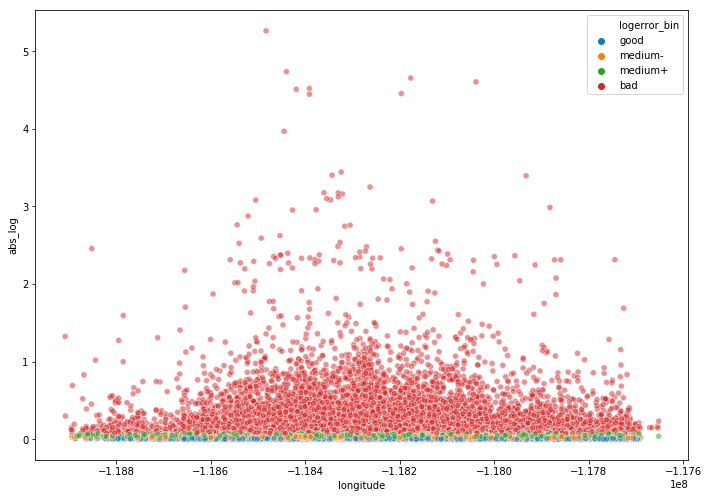

In [47]:
ax = sns.scatterplot(x="longitude", y="abs_log", 
                     hue='logerror_bin', data=df, alpha=.5)
fig = plt.gcf()
fig.set_size_inches(11.7, 8.27)

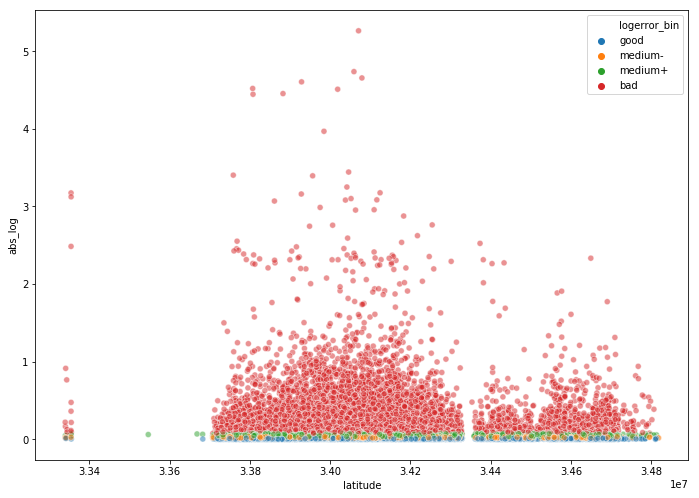

In [48]:
ax = sns.scatterplot(x="latitude", y="abs_log", 
                     hue='logerror_bin', data=df, alpha=.5)
fig = plt.gcf()
fig.set_size_inches(11.7, 8.27)

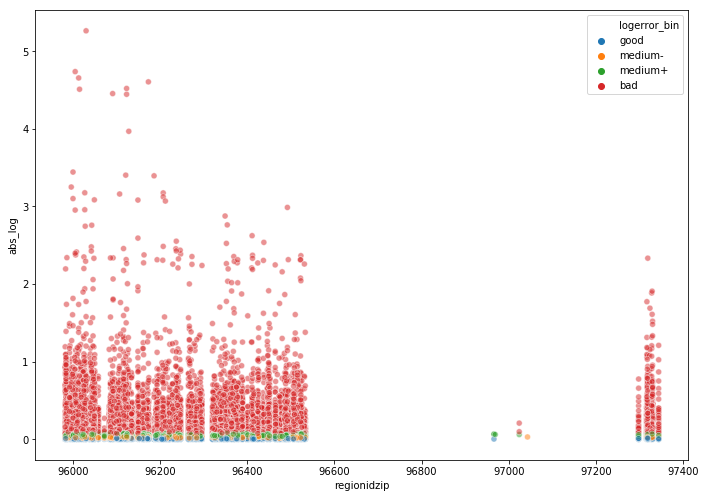

In [49]:
ax = sns.scatterplot(x="regionidzip", y="abs_log", 
                     hue='logerror_bin', data=df, alpha=.5)
fig = plt.gcf()
fig.set_size_inches(11.7, 8.27)

In [50]:
ax = sns.scatterplot(x="regionidcity", y="abs_log", 
                     hue='logerror_bin', data=df, alpha=.5)
fig = plt.gcf()
fig.set_size_inches(11.7, 8.27)

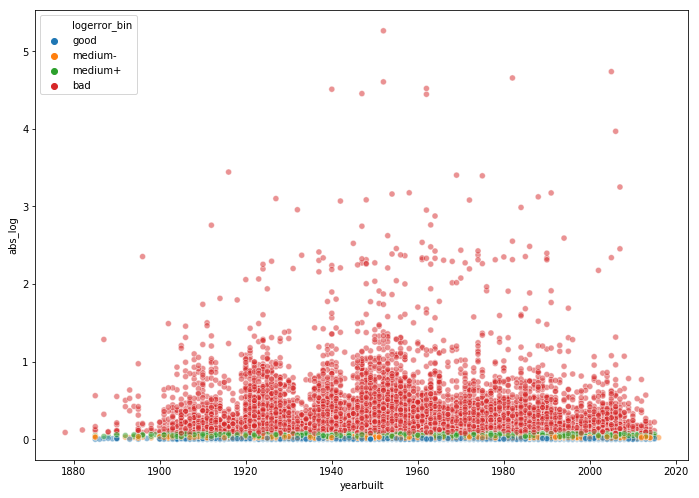

In [51]:
ax = sns.scatterplot(x="yearbuilt", y="abs_log", 
                     hue='logerror_bin', data=df, alpha=.5)
fig = plt.gcf()
fig.set_size_inches(11.7, 8.27)

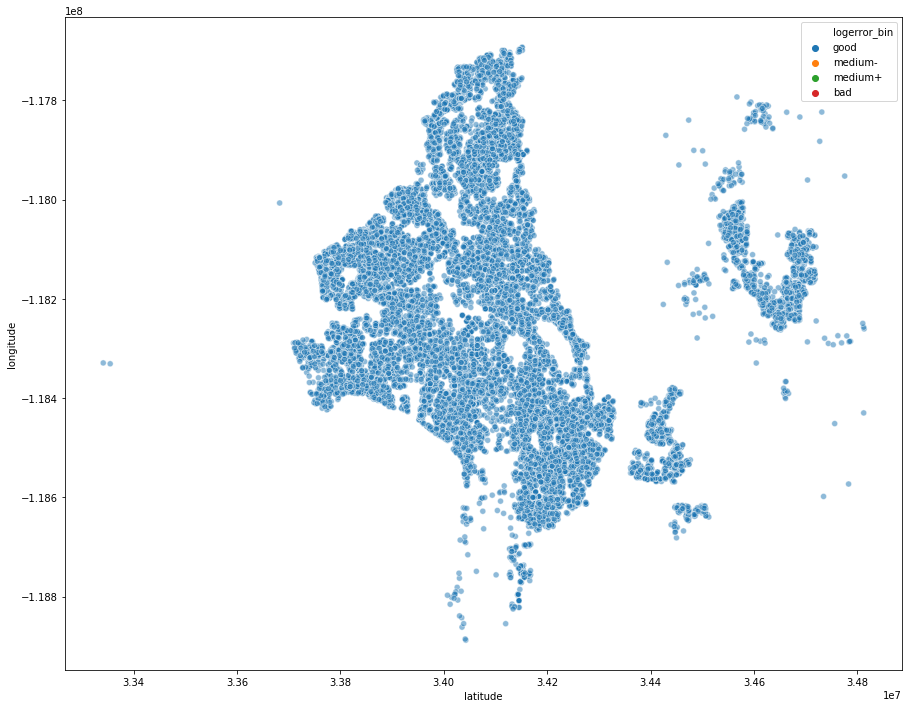

In [52]:
bad = df[df.logerror_bin == 'bad']
medium_bad = df[df.logerror_bin == 'medium-']
medium_good = df[df.logerror_bin == 'medium+']
good = df[df.logerror_bin == 'good']



# ax = sns.scatterplot(x="latitude", y="longitude", 
#                      hue='logerror_bin', data=bad, alpha=.5)
# ax = sns.scatterplot(x="latitude", y="longitude", 
#                      hue='logerror_bin', data=medium_bad, alpha=.5)
# ax = sns.scatterplot(x="latitude", y="longitude", 
#                      hue='logerror_bin', data=medium_good, alpha=.5)
ax = sns.scatterplot(x="latitude", y="longitude", 
                     hue='logerror_bin', data=good, alpha=.5)

fig = plt.gcf()
fig.set_size_inches(15, 12)

# K-Means

### <span style="color:red">Cluster 1</span>

In [53]:
X1 = df[['logerror']]

In [54]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X1)

kmeans.predict(X1)

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [55]:
kmeans.cluster_centers_

array([[-0.09017823],
       [ 0.40373163],
       [ 2.04456513],
       [ 0.02925897],
       [-0.78053301]])

In [56]:
cluster_target = pd.DataFrame(kmeans.cluster_centers_, columns=X1.columns)\
    .reset_index()\
    .rename({'index': 'cluster'}, axis=1)\
    .set_index('cluster')

In [57]:
cluster_target

logerror
cluster                     
0                      -0.09
1                       0.40
2                       2.04
3                       0.03
4                      -0.78

In [58]:
df['cluster1'] = kmeans.predict(X1)
df.cluster1.value_counts()

3    66193
0    22189
1     3458
4      578
2      156
Name: cluster1, dtype: int64

### <span style="color:red">Cluster 2</span>

In [59]:
X2 = df[['latitude']]

In [60]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X2)

kmeans.predict(X2)

array([1, 1, 0, ..., 1, 3, 0], dtype=int32)

In [61]:
kmeans.cluster_centers_

array([[33846207.21692977],
       [34178741.28740354],
       [34406005.62295419],
       [34031992.79108089],
       [34631971.93948784]])

In [62]:
cluster_target = pd.DataFrame(kmeans.cluster_centers_, columns=X2.columns)\
    .reset_index()\
    .rename({'index': 'cluster'}, axis=1)\
    .set_index('cluster')

In [63]:
df['cluster2'] = kmeans.predict(X2)
df.cluster2.value_counts()

1    29764
3    29668
0    20877
4     7423
2     4842
Name: cluster2, dtype: int64

### <span style="color:red">Cluster 3</span>

In [64]:
X3 = df[['longitude']]

In [65]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X3)

kmeans.predict(X3)

array([4, 0, 3, ..., 3, 0, 0], dtype=int32)

In [66]:
kmeans.cluster_centers_

array([[-1.18096846e+08],
       [-1.18570794e+08],
       [-1.17859646e+08],
       [-1.18254203e+08],
       [-1.18406458e+08]])

In [67]:
cluster_target = pd.DataFrame(kmeans.cluster_centers_, columns=X3.columns)\
    .reset_index()\
    .rename({'index': 'cluster'}, axis=1)\
    .set_index('cluster')

In [68]:
df['cluster3'] = kmeans.predict(X3)
df.cluster3.value_counts()

4    25285
0    23866
3    20585
1    12825
2    10013
Name: cluster3, dtype: int64

### <span style="color:red">Cluster 4</span>

In [69]:
X4 = df[['logerror','longitude', 'latitude']]

In [70]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X4)

kmeans.predict(X4)

array([4, 1, 3, ..., 1, 0, 0], dtype=int32)

In [71]:
kmeans.cluster_centers_

array([[ 1.95572771e-02, -1.17965186e+08,  3.40617687e+07],
       [ 5.46055819e-03, -1.18343776e+08,  3.40913204e+07],
       [ 1.27354119e-02, -1.18123765e+08,  3.46270569e+07],
       [ 1.31449614e-02, -1.18233098e+08,  3.38528394e+07],
       [ 1.65749013e-02, -1.18532216e+08,  3.42498565e+07]])

In [72]:
cluster_target4 = pd.DataFrame(kmeans.cluster_centers_, columns=X4.columns)\
    .reset_index()\
    .rename({'index': 'cluster'}, axis=1)\
    .set_index('cluster')

cluster_target4

logerror            longitude             latitude
cluster                                                               
0                       0.02      -117,965,185.60        34,061,768.66
1                       0.01      -118,343,775.77        34,091,320.40
2                       0.01      -118,123,764.75        34,627,056.86
3                       0.01      -118,233,097.87        33,852,839.44
4                       0.02      -118,532,216.32        34,249,856.48

In [73]:
df['cluster4'] = kmeans.predict(X4)
df.cluster4.value_counts()

1    25751
3    21638
0    19493
4    18019
2     7673
Name: cluster4, dtype: int64

### <span style="color:red">Cluster 5</span>

In [74]:
X5 = df[['logerror','longitude', 'latitude']]

In [75]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(X5)

kmeans.predict(X5)

array([1, 4, 0, ..., 1, 4, 7], dtype=int32)

In [76]:
kmeans.cluster_centers_

array([[ 1.16403910e-02, -1.18323854e+08,  3.38491493e+07],
       [ 1.20810284e-02, -1.18402540e+08,  3.42068576e+07],
       [ 2.35513190e-02, -1.17868157e+08,  3.40654480e+07],
       [ 1.22660353e-02, -1.18121519e+08,  3.46265085e+07],
       [ 1.10352048e-02, -1.18149458e+08,  3.41217268e+07],
       [ 2.01831788e-02, -1.18583818e+08,  3.41856185e+07],
       [ 2.27446946e-03, -1.18388581e+08,  3.40346683e+07],
       [ 1.49539430e-02, -1.18117322e+08,  3.38741253e+07],
       [ 1.37327924e-02, -1.18513439e+08,  3.44228830e+07]])

In [77]:
cluster_target5 = pd.DataFrame(kmeans.cluster_centers_, columns=X5.columns)\
    .reset_index()\
    .rename({'index': 'cluster'}, axis=1)\
    .set_index('cluster')

cluster_target5

logerror            longitude             latitude
cluster                                                               
0                       0.01      -118,323,853.61        33,849,149.28
1                       0.01      -118,402,539.96        34,206,857.56
2                       0.02      -117,868,156.66        34,065,447.96
3                       0.01      -118,121,518.95        34,626,508.55
4                       0.01      -118,149,458.22        34,121,726.83
5                       0.02      -118,583,818.36        34,185,618.50
6                       0.00      -118,388,581.37        34,034,668.25
7                       0.01      -118,117,321.92        33,874,125.33
8                       0.01      -118,513,439.35        34,422,882.98

In [78]:
df['cluster5'] = kmeans.predict(X5)
df.cluster5.value_counts()

6    14032
7    13519
4    12319
0    10886
1    10736
2    10220
5     9342
3     7623
8     3897
Name: cluster5, dtype: int64

# Plotting

### <span style="color:red">Plotting Cluster 1</span>

3    66193
0    22189
1     3458
4      578
2      156
Name: cluster1, dtype: int64

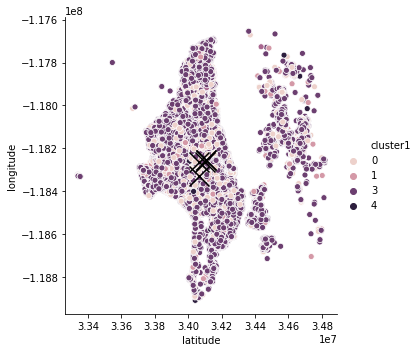

In [79]:
centers = df.groupby('cluster1').mean()


sns.relplot(data=df, x='latitude', y='longitude', hue='cluster1')
plt.scatter(centers.latitude, centers.longitude, s=400, marker='x', c='black', label='center')

df.cluster1.value_counts()

### <span style="color:red">Plotting Cluster 2</span>

In [80]:
centers = df.groupby('cluster2').mean()


sns.relplot(data=df, x='latitude', y='longitude', hue='cluster2')
plt.scatter(centers.latitude, centers.longitude, s=400, marker='x', c='black', label='center')

df.cluster2.value_counts()

1    29764
3    29668
0    20877
4     7423
2     4842
Name: cluster2, dtype: int64

### <span style="color:red">Plotting Cluster 3</span>

In [81]:
centers = df.groupby('cluster3').mean()


sns.relplot(data=df, x='latitude', y='longitude', hue='cluster3')
plt.scatter(centers.latitude, centers.longitude, s=400, marker='x', c='black', label='center')

df.cluster3.value_counts()

4    25285
0    23866
3    20585
1    12825
2    10013
Name: cluster3, dtype: int64

### <span style="color:red">Plotting Cluster 4</span>

In [82]:
centers4 = df.groupby('cluster4').mean()


sns.relplot(data=df, x='latitude', y='longitude', hue='cluster4')
plt.scatter(centers4.latitude, centers4.longitude, s=400, marker='x', c='black', label='center')

df.cluster4.value_counts()

1    25751
3    21638
0    19493
4    18019
2     7673
Name: cluster4, dtype: int64

### <span style="color:red">Plotting Cluster 5</span>

6    14032
7    13519
4    12319
0    10886
1    10736
2    10220
5     9342
3     7623
8     3897
Name: cluster5, dtype: int64

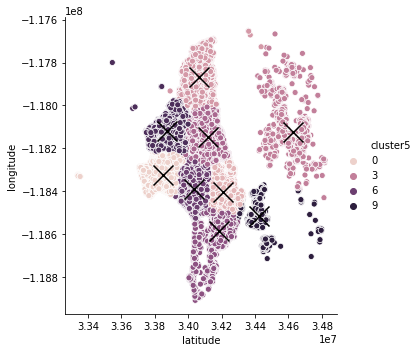

In [83]:
centers5 = df.groupby('cluster5').mean()


sns.relplot(data=df, x='latitude', y='longitude', hue='cluster5')
plt.scatter(centers5.latitude, centers5.longitude, s=400, marker='x', c='black', label='center')

df.cluster5.value_counts()

   k                      sse
0  1 8,761,530,032,733,308.00
1  2 5,204,029,631,308,456.00
2  3 3,202,981,920,593,352.50
3  4 2,017,825,711,291,747.00
4  5 1,506,148,255,569,767.50
5  6 1,216,556,254,098,207.00
6  7   993,364,331,011,948.12
7  8   847,994,934,478,840.75
8  9   734,394,370,637,906.88


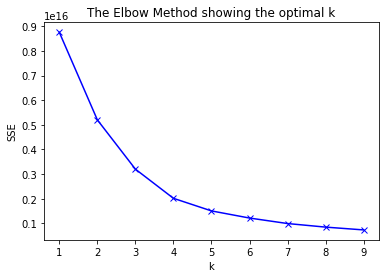

In [84]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X4)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

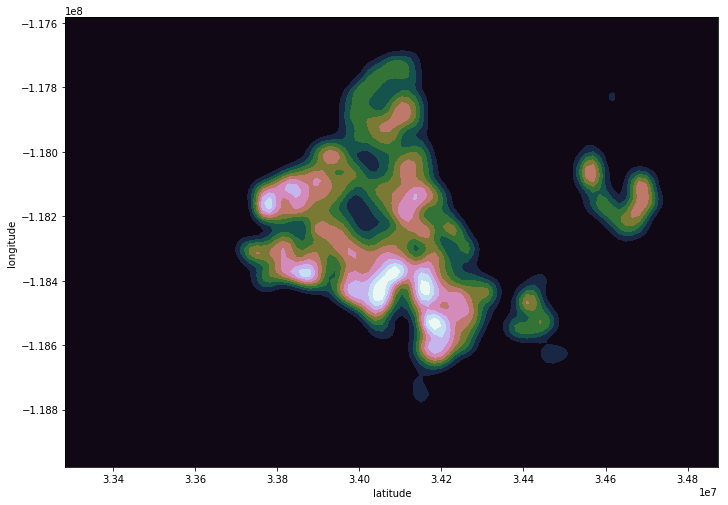

In [85]:
kde_func(df.latitude, df.longitude)

In [86]:
estimators = [('4 Clusters', KMeans(n_clusters=4)),
              ('5 Clusters', KMeans(n_clusters=5)),
              ('6 Clusters', KMeans(n_clusters=6)),
              ('7 Clusters', KMeans(n_clusters=7)),
              ('8 Clusters', KMeans(n_clusters=8)),
              ('9 Clusters', KMeans(n_clusters=9)),
              ('10 Clusters', KMeans(n_clusters=10))
             ]

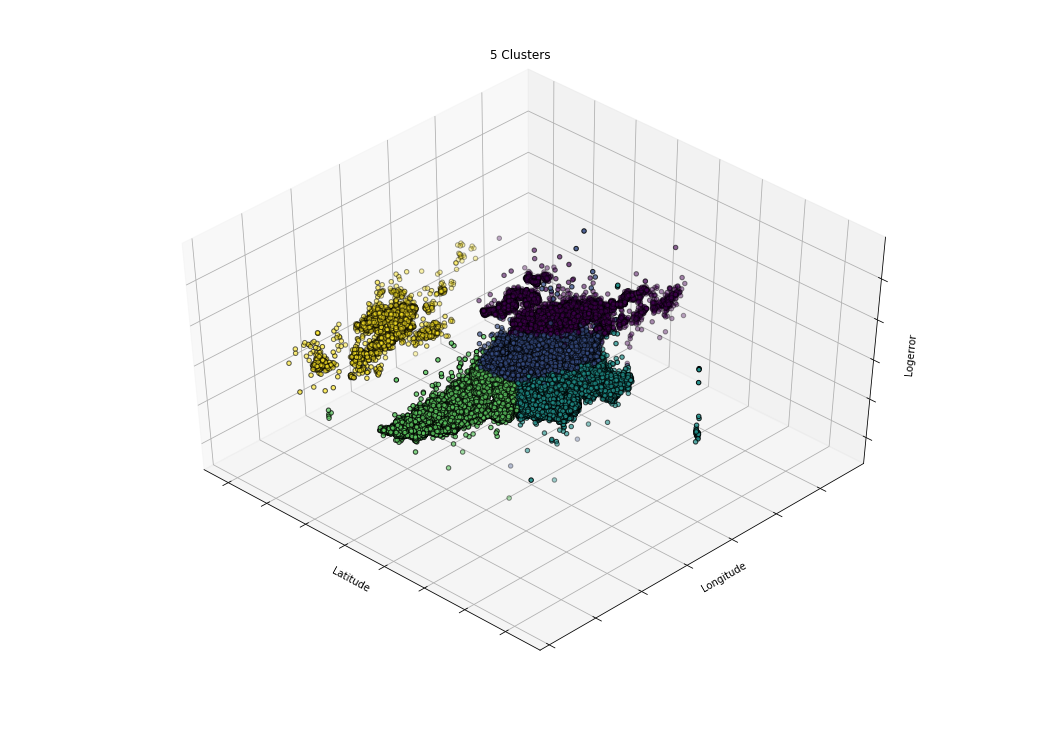

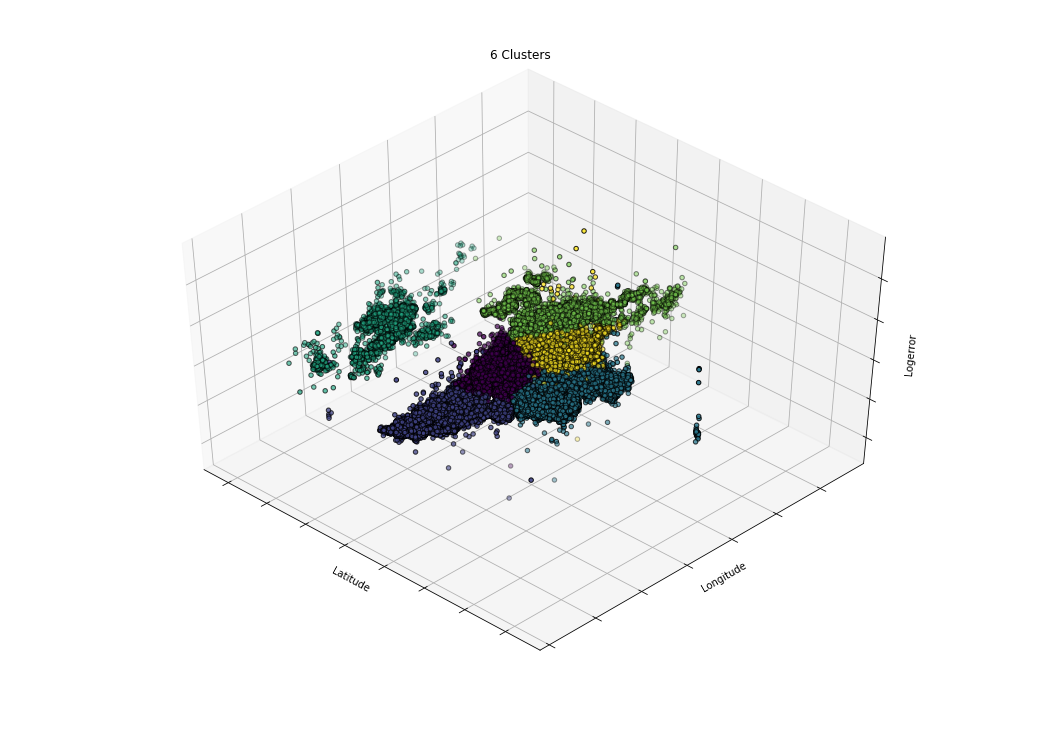

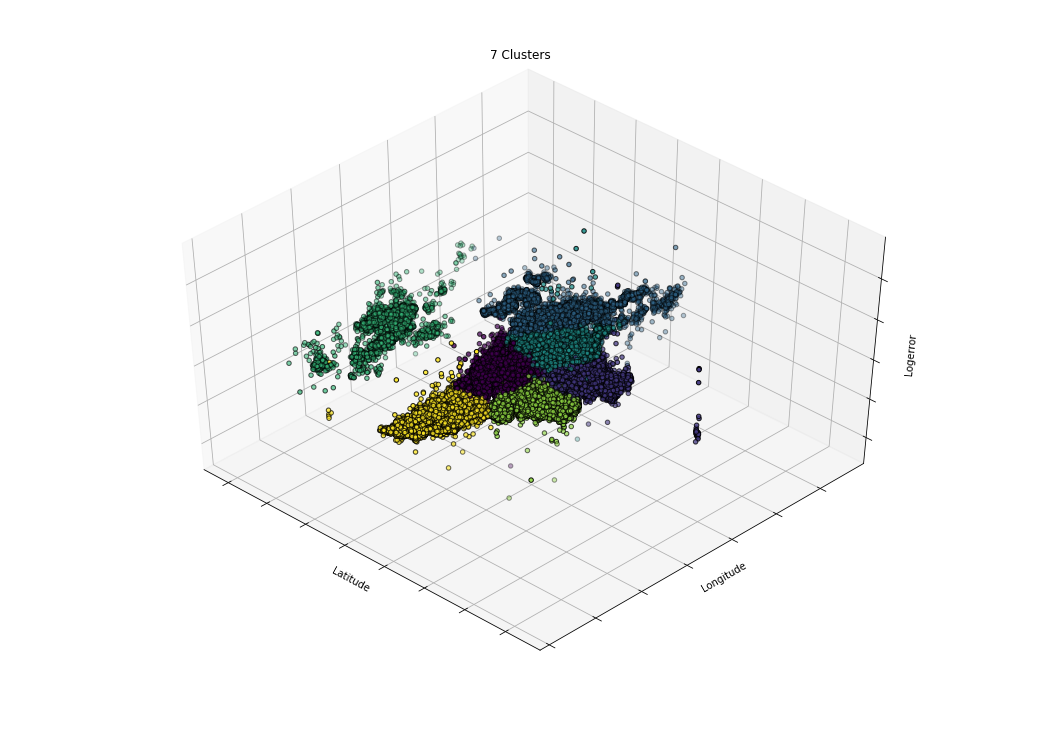

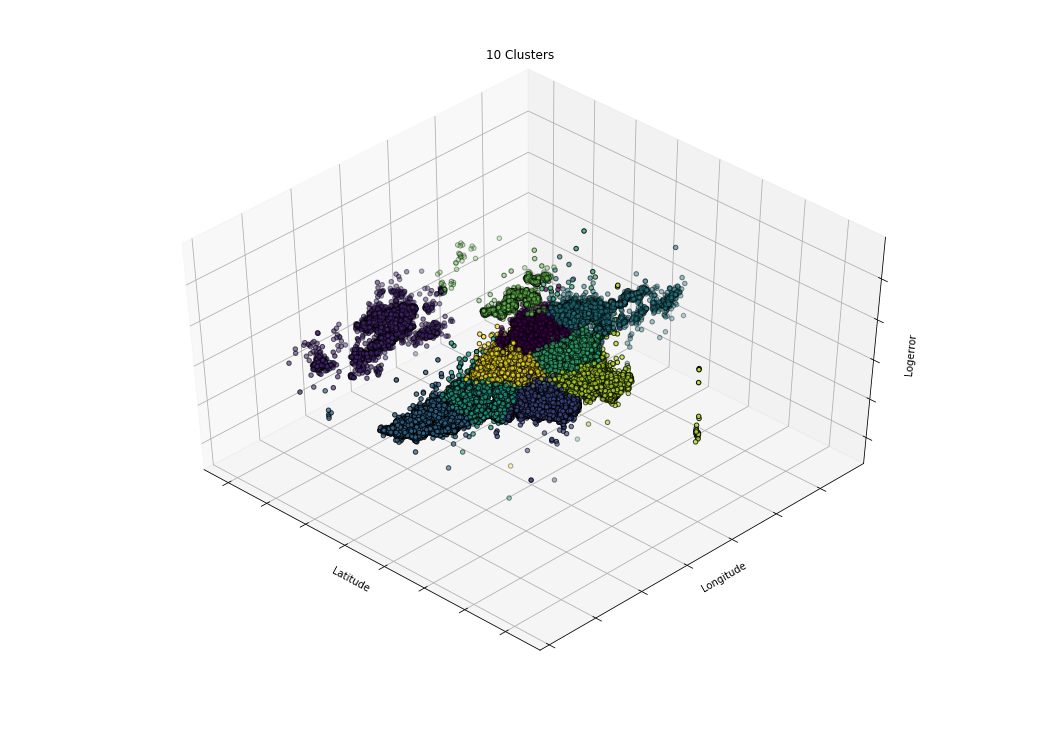

In [87]:
for i, (title, kmeans) in enumerate(estimators):
    # fit the kmeans object
    kmeans.fit(X4)

    fig = plt.figure(i + 1, figsize=(15, 10))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    labels = kmeans.labels_

    ax.scatter(X4.latitude, 
               X4.longitude, 
               X4.logerror,
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.set_zlabel('Logerror')
    ax.set_title(title)
    ax.dist = 12

### Since im trying to cluster by density zones, based on the kde plot the 9 cluster seems to fit best

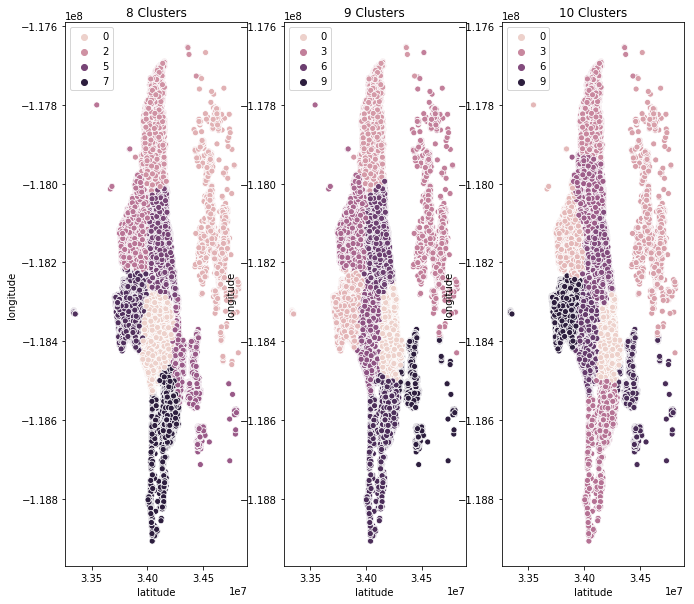

In [88]:
estimators2 = [
              ('8 Clusters', KMeans(n_clusters=8)),
              ('9 Clusters', KMeans(n_clusters=9)),
              ('10 Clusters', KMeans(n_clusters=10))
             ]

plt.subplots(nrows=1,ncols=2, figsize=(15,10))
for i, (title, kmeans) in enumerate(estimators2):
    kmeans.fit(X4)
    labels = kmeans.labels_
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    plt.subplot(1,4, plot_number)
    plt.title(title)
    sns.scatterplot(X4.latitude, X4.longitude, hue=labels)

In [89]:
crosstab = pd.crosstab(df['cluster5'] == 0, df['logerror_bin'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 0.005989070764852923


In [90]:
crosstab = pd.crosstab(df['cluster5'] == 1, df['logerror_bin'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 2.3702276146468085e-08


In [91]:
crosstab = pd.crosstab(df['cluster5'] == 2, df['logerror_bin'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 8.736573734141299e-65


In [92]:
crosstab = pd.crosstab(df['cluster5'] == 3, df['logerror_bin'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 1.4947917094162773e-16


In [93]:
crosstab = pd.crosstab(df['cluster5'] == 4, df['logerror_bin'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 1.0910837297737257e-78


In [94]:
crosstab = pd.crosstab(df['cluster5'] == 5, df['logerror_bin'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 0.01468268400471686


In [95]:
crosstab = pd.crosstab(df['cluster5'] == 6, df['logerror_bin'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 1.3726158849855302e-181


In [96]:
crosstab = pd.crosstab(df['cluster5'] == 7, df['logerror_bin'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 1.7774409356109581e-69


In [97]:
crosstab = pd.crosstab(df['cluster5'] == 8, df['logerror_bin'])
chi2_value, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("The p-value: {}".format(p_value))

The p-value: 4.7267321091470796e-111


### All p-values are acceptable to reject the null hypothesis

# Modeling

In [98]:
dummies = pd.get_dummies(df['cluster5']).rename(columns=lambda x: 'cluster_' + str(x))
df = pd.concat([df, dummies], axis=1)
### df = df.drop(['cluster'], inplace=True, axis=1)

# <span style="color:red">KNN</span>

In [99]:
X = df[['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4',
        'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8','latitude','longitude']]
y = df[['logerror_bin']]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.70, random_state=123)

In [101]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [102]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [103]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.51


In [124]:
print(classification_report(y_train, y_pred))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

              precision    recall  f1-score   support

         bad       0.37      0.45      0.41     16168
        good       0.33      0.41      0.37     16365
     medium+       0.34      0.17      0.23     16132
     medium-       0.30      0.31      0.30     16136

   micro avg       0.34      0.34      0.34     64801
   macro avg       0.33      0.34      0.33     64801
weighted avg       0.33      0.34      0.33     64801

Accuracy of KNN classifier on test set: 0.30


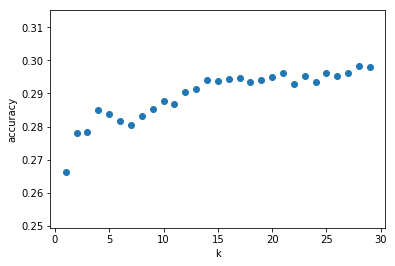

In [105]:
k_range = range(1, 30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20, 25, 30])
plt.show()

In [106]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.30


### <span style="color:red"> Decision Tree </span>

In [123]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=123, 
                             class_weight='balanced', max_features=4, min_samples_split=4)
clf.fit(X_train, y_train)

# Estimate churn
y_pred = clf.predict(X_train)
print('y_pred: ', y_pred)
print('y_pred has ', len(y_pred), ' entries.')

y_pred_proba = clf.predict_proba(X_train)
print('y_pred_proba: ')
print(y_pred_proba)
print("y_pred_proba's shape: ", y_pred_proba.shape)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

### Super Confusion Matrix
print(confusion_matrix(y_train, y_pred))

print(classification_report(y_train, y_pred))

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_test, y_test)))

y_pred:  ['bad' 'bad' 'good' ... 'good' 'medium-' 'medium-']
y_pred has  64801  entries.
y_pred_proba: 
[[0.34929398 0.1696528  0.2659776  0.21507561]
 [0.3876023  0.14860218 0.27830491 0.18549061]
 [0.21823243 0.31314114 0.23434226 0.23428417]
 ...
 [0.15050111 0.32183683 0.24378089 0.28388118]
 [0.15397744 0.28933365 0.24509815 0.31159076]
 [0.18782744 0.27100166 0.26026039 0.2809105 ]]
y_pred_proba's shape:  (64801, 4)
Accuracy of Decision Tree classifier on training set: 0.34
[[7332 3442 2021 3373]
 [3743 6671 1674 4277]
 [4849 4539 2816 3928]
 [4084 5320 1800 4932]]
              precision    recall  f1-score   support

         bad       0.37      0.45      0.41     16168
        good       0.33      0.41      0.37     16365
     medium+       0.34      0.17      0.23     16132
     medium-       0.30      0.31      0.30     16136

   micro avg       0.34      0.34      0.34     64801
   macro avg       0.33      0.34      0.33     64801
weighted avg       0.33      0.34      0.3

### <span style="color:red"> Random Forest </span>

In [110]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [111]:
rf.fit(X_train, y_train)
print(rf.feature_importances_)

[0.0016837  0.00429895 0.06834503 0.01811204 0.10139563 0.00040738
 0.25937829 0.05524852 0.13515278 0.17893935 0.17703832]


In [112]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

In [113]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.30


In [114]:
print(confusion_matrix(y_train, y_pred))

[[9224 5381 1503   60]
 [6020 8326 1947   72]
 [7843 6369 1866   54]
 [6717 7470 1860   89]]


In [125]:
print(classification_report(y_train, y_pred))
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

              precision    recall  f1-score   support

         bad       0.37      0.45      0.41     16168
        good       0.33      0.41      0.37     16365
     medium+       0.34      0.17      0.23     16132
     medium-       0.30      0.31      0.30     16136

   micro avg       0.34      0.34      0.34     64801
   macro avg       0.33      0.34      0.33     64801
weighted avg       0.33      0.34      0.33     64801

Accuracy of random forest classifier on test set: 0.30


### <span style= "color:red"> Logistic Regression </span>

In [116]:
logit = LogisticRegression(C=1, random_state=0, solver='saga', class_weight='balanced', verbose=True)

In [117]:
logit.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 72 epochs took 2 seconds
convergence after 68 epochs took 1 seconds
convergence after 71 epochs took 2 seconds
convergence after 72 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.0s finished


LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='saga', tol=0.0001, verbose=True, warm_start=False)

In [118]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-7.31744233e-13  1.40662384e-12 -5.56754569e-12  3.85347049e-13
   6.28978544e-12 -1.23262694e-12  1.02041701e-11 -6.89400325e-12
  -3.88050842e-12 -2.22129616e-07 -6.40574910e-08]
 [ 2.40403515e-13 -2.44258128e-12  4.00646048e-12  5.26901453e-13
  -5.19429711e-12  3.74575292e-13 -7.06972961e-12  6.51754323e-12
   3.05976722e-12  2.92310480e-07  8.43115179e-08]
 [ 1.46784333e-13  1.25255069e-12 -1.15852865e-12 -6.27793161e-13
   2.58585623e-12 -1.51402742e-16  1.59180837e-12 -2.57347739e-12
  -1.22301953e-12 -1.53567155e-07 -4.42861132e-08]
 [ 2.87491159e-13 -3.78023202e-14  2.44729715e-12 -3.15006541e-13
  -3.27485871e-12  8.30482212e-13 -4.39549162e-12  2.67296952e-12
   1.79178337e-12  6.21380759e-08  1.79211974e-08]]
Intercept: 
 [-2.05021078e-14  1.90431973e-14 -5.97051839e-15  6.86421806e-15]


In [119]:
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)

In [120]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.27


In [126]:
print(classification_report(y_train, y_pred))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

              precision    recall  f1-score   support

         bad       0.37      0.45      0.41     16168
        good       0.33      0.41      0.37     16365
     medium+       0.34      0.17      0.23     16132
     medium-       0.30      0.31      0.30     16136

   micro avg       0.34      0.34      0.34     64801
   macro avg       0.33      0.34      0.33     64801
weighted avg       0.33      0.34      0.33     64801

Accuracy of Logistic Regression classifier on test set: 0.27


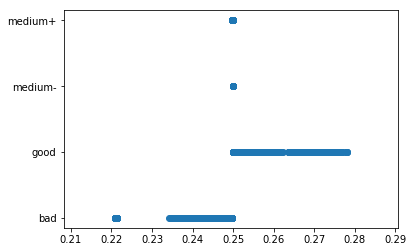

In [122]:
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)
plt.show()